## 1. Kohonen maps and Hebbian Learning

### Briefly explain following questions:

#### How many layers are there in a Kohonen Map and what do they do?

*Answer*:
There are two layers in a Kohonen Map. The first layer is the input layer consisting of only one neuron. The second layer is a two-dimensional lattice of neurons. The first layer is fully connected to the second layer. There are no lateral connections between neurons in the second layer but their spatial relationship is preserved throughout the training procedure. 

Each connection between a neuron in the second layer and the input neuron is represented by a weight vector.

#### The self-organising process have 4 components; Initialization, Competition, Cooperation and Adaptation. How are all these components implemented in the Kohonen Map?

*Answer* 
    - Initialization: 
    - Competition:
    - Cooperation:
    - Adaptation:

#### Describe how a Kohonen Map performs dimensionality reduction.

*Answer*: 
Suppose we have an input data, made up of 6000 vectors, each vector represents 8 features. If we define the Kohonen map's architecture to be a 2-dimensional 10 x 10 x 8 grid (100 neurons, each having a vector of 8 features). Then, after training the Kohonen map, the 6000 vectors are now being 'clustered' into 100 nodes. 

During the training process, a node may have 'won' several input samples and those input samples are now 'clustered' around this specific node. That is, several input samples are now represented by this node. This is how dimensionality reduction is achieved. 

We can also verify that the input data (6000 x 8 = 48000) are now represented by (10 x 10 x 8 = 800). The input data has been reduced 60 times.

#### Kohonen maps are also described as Topographic maps, what is meant by Topographic maps and give an example of their possible presence in the human brain.

*Answer*:

####  Which one of the Hebbian type learning rule corresponds to the weight update in the Kohonen maps (Reminder of the examples of Hebbian type rules: Have a look at the Lecture 2, slide number 9). Show how can you obtain the learning rule of the Kohonen map from the corresponding Hebbian rule.

*Answer*:

In [1]:
import numpy as np
import matplotlib.pylab as plb

In [2]:
# load in data and labels    
data = np.array(np.loadtxt('data.txt')) # (5000L, 784L) -> note that 784 = 28*28
labels = np.loadtxt('labels.txt') 
dy, dx = data.shape

def kohonen(_sigma = 2, _size_k = 6, _eta = 0.9, _tmax = 5000):
    plb.close('all')
    
    dim = 28*28
    data_range = 255.0

    # select 4 digits    
#     name = 'Wong Wen Yan' # REPLACE BY YOUR OWN NAME
#     targetdigits = name2digits(name) # assign the four digits that should be used
    targetdigits = [1, 3, 5, 7]

    # this selects all data vectors that corresponds to one of the four digits
    data = data[np.logical_or.reduce([labels==x for x in targetdigits]),:]
    
    print(np.count_nonzero(labels == 1),  np.count_nonzero(labels == 3))
    print(np.count_nonzero(labels == 5),  np.count_nonzero(labels == 7))
    
    # set the size of the Kohonen map, width of neighbourhood of gaussian, learning rate, maximal interation count
    size_k, sigma, eta, tmax = _size_k, _sigma, _eta, _tmax
    
    #initialise the centers randomly
    centers = np.random.rand(size_k**2, dim) * data_range
    
    #build a neighborhood matrix
    neighbor = np.arange(size_k**2).reshape((size_k, size_k))
    
    #set the random order in which the datapoints should be presented
    i_random = np.arange(tmax) % dy
    np.random.shuffle(i_random)
    
    for t, i in enumerate(i_random):
        som_step(centers, data[i,:],neighbor,eta,sigma)

    # for visualization, you can use this:
    for i in range(1, size_k**2+1):
        plb.subplot(size_k,size_k,i)
        
        plb.imshow(np.reshape(centers[i-1,:], [28, 28]),interpolation='bilinear')
        plb.axis('off')
        
    # leave the window open at the end of the loop
    plb.show()
    plb.draw()
    
    # uncomment for saving figure
#     name = "size_k-" + str(_size_k) + "-sigma-" + str(_sigma) + "-eta-" + str(_eta) + "-tmax-" + str(_tmax)
#     plb.savefig("%s_rgb.png" % name)
    
    
def som_step(centers,data,neighbor,eta,sigma):
    """Performs one step of the sequential learning for a 
    self-organized map (SOM).
    
      centers = som_step(centers,data,neighbor,eta,sigma)
    
      Input and output arguments: 
       centers  (matrix) cluster centres. Have to be in format:
                         center X dimension
       data     (vector) the actually presented datapoint to be presented in
                         this timestep
       neighbor (matrix) the coordinates of the centers in the desired
                         neighborhood.
       eta      (scalar) a learning rate
       sigma    (scalar) the width of the gaussian neighborhood function.
                         Effectively describing the width of the neighborhood
    """
    
    size_k = int(np.sqrt(len(centers)))
    
    #find the best matching unit via the minimal distance to the datapoint
    b = np.argmin(np.sum((centers - np.resize(data, (size_k**2, data.size)))**2,1))

    # find coordinates of the winner
    a,b = np.nonzero(neighbor == b)
        
    # update all units
    for j in range(size_k**2):
        # find coordinates of this unit
        a1,b1 = np.nonzero(neighbor==j)
        # calculate the distance and discounting factor
        disc=gauss(np.sqrt((a-a1)**2+(b-b1)**2),[0, sigma])
        # update weights        
        centers[j,:] += disc * eta * (data - centers[j,:])
        

def gauss(x,p):
    """Return the gauss function N(x), with mean p[0] and std p[1].
    Normalized such that N(x=p[0]) = 1.
    """
    return np.exp((-(x - p[0])**2) / (2 * p[1]**2))

def name2digits(name):
    """ takes a string NAME and converts it into a pseudo-random selection of 4
     digits from 0-9.
     
     Example:
     name2digits('Felipe Gerhard')
     returns: [0 4 5 7]
     """
    
    name = name.lower()
    
    if len(name)>25:
        name = name[0:25]
        
    primenumbers = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97]
    
    n = len(name)
    
    s = 0.0
    
    for i in range(n):
        s += primenumbers[i]*ord(name[i])*2.0**(i+1)

    import scipy.io.matlab
    Data = scipy.io.matlab.loadmat('hash.mat',struct_as_record=True)
    x = Data['x']
    t = np.int(np.mod(s,x.shape[0]))

    return np.sort(x[t,:])


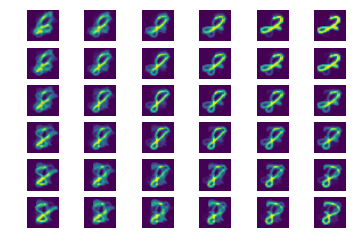

Number of correct predictions for training set: 892
Test accuracy: 0.575483870968
---------------------------------------
Number of correct predictions for testing set: 245
Test accuracy: 0.544444444444
---------------------------------------
Clusters in Kohonen map: 
{0: 6, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 6, 7: 4, 8: 8, 12: 4, 13: 8, 14: 8, 16: 8, 17: 4, 18: 8, 19: 8, 20: 8, 21: 8, 22: 4, 23: 4, 24: 8, 25: 8, 26: 8, 27: 8, 28: 8, 29: 8, 30: 4, 31: 4, 32: 2, 33: 2, 34: 8, 35: 8}


In [20]:
def most_common(lst):
    return max(set(lst), key=lst.count)

def kohonen_test_supervised(targetdigits = [2, 4, 6, 8], _sigma = 2, _size_k = 6, _eta = 0.9, _tmax = 5000):
    dim = 28*28
    data_range = 255.0
    
    train = 0.7
    
    data_and_labels = np.concatenate((data, labels[:, None]), axis = 1)
    
    temp_data = data_and_labels[np.logical_or.reduce([labels==x for x in [targetdigits[0]] ]),:]
    train, test = temp_data[0 : int(0.7 * len(data))], temp_data[int(0.7 * len(data)) : len(data)]
    
    for i in range(1, len(targetdigits)):
        temp_data = data_and_labels[np.logical_or.reduce([labels==x for x in [targetdigits[i]] ]),:]
        train = np.concatenate((train, temp_data[0 : int(0.7 * len(temp_data))]))
        test = np.concatenate((test, temp_data[int(0.7 * len(temp_data)) : len(temp_data)]))
    
    # split into training and testing set
    x_train, y_train = train[:, 0 : len(train[0]) - 1], train[:, -1]
    x_test, y_test = test[:, 0 : len(test[0]) - 1], test[:, -1]
    
    size_k, sigma, eta, tmax = _size_k, _sigma, _eta, _tmax
    
    # shuffle data
    i_random = np.arange(tmax) % dy
    np.random.shuffle(i_random)
    
    #initialise the centers randomly
    centers = np.random.rand(size_k**2, dim) * data_range
    
    #build a neighborhood matrix
    neighbor = np.arange(size_k**2).reshape((size_k, size_k))
    
    #set the random order in which the datapoints should be presented
    i_random = np.arange(tmax) % len(train)
    np.random.shuffle(i_random)
    
    for t, i in enumerate(i_random):
        som_step(centers, x_train[i,:],neighbor,eta,sigma)
        
    # for visualization, you can use this:
    for i in range(1, size_k**2+1):
        plb.subplot(size_k,size_k,i)
        
        plb.imshow(np.reshape(centers[i-1,:], [28, 28]),interpolation='bilinear')
        plb.axis('off')
        
    # leave the window open at the end of the loop
    plb.show()
    plb.draw()
    
    # identify 'clusters', treat each winning neuron (based on training dataset) as a cluster itself
    clusters = [[] for i in range(size_k**2)]
    winning_clusters = {}
    
    for i in range(len(x_train)):
        # find winning neuron
        win_location = np.argmin(np.sum((centers - np.resize(x_train[i], (size_k**2, x_train[i].size)))**2,1))
        clusters[win_location].append(int(y_train[i]))
        
    for i in range(len(clusters)):
        if len(clusters[i]) > 0: 
            winning_clusters[i] = most_common(clusters[i])
            
    # Calculate accuracy
    train_accuracy = 0
    test_accuracy = 0
    
    for i in range(len(x_train)):
        min_loc = winning_clusters.keys()[0]
        
        for j in winning_clusters.keys():
            if np.linalg.norm(x_train[i] - centers[j]) < np.linalg.norm(x_train[i] - centers[min_loc]):
                min_loc = j
                
        if int(winning_clusters[min_loc]) == int(y_train[i]):
            train_accuracy += 1
            
    print("Number of correct predictions for training set: " + str(train_accuracy))
    print("Test accuracy: " + str(float(train_accuracy)/len(x_train)))
    print("---------------------------------------")
    
    for i in range(len(x_test)):
        min_loc = winning_clusters.keys()[0]
        
        for j in winning_clusters.keys():
            if np.linalg.norm(x_test[i] - centers[j]) < np.linalg.norm(x_test[i] - centers[min_loc]):
                min_loc = j
                
        if int(winning_clusters[min_loc]) == int(y_test[i]):
            test_accuracy += 1
    
    print("Number of correct predictions for testing set: " + str(test_accuracy))
    print("Test accuracy: " + str(float(test_accuracy)/len(x_test)))
    print("---------------------------------------")
    print("Clusters in Kohonen map: ")
    print(winning_clusters)
    

kohonen_test_supervised() 

## Default Configurations

(500, 500)
(500, 500)


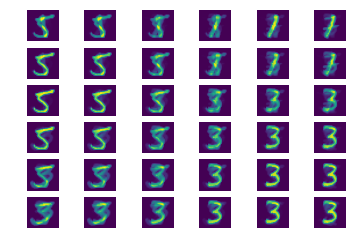

''

In [3]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

## Varying sigma

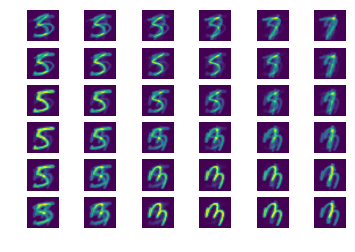

In [17]:
config = {
    'sigma': 1.75,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

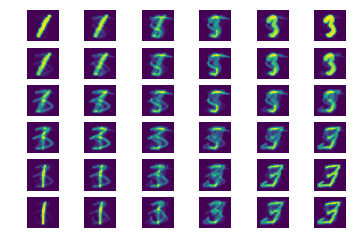

In [18]:
config = {
    'sigma': 1.5,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

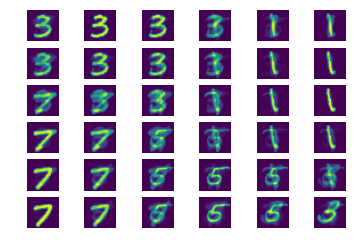

In [19]:
config = {
    'sigma': 1.25,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

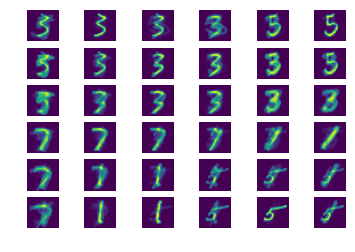

In [20]:
config = {
    'sigma': 1,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

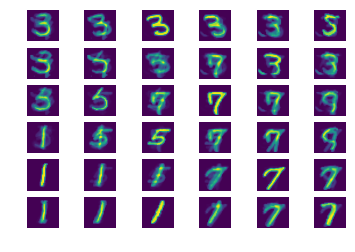

In [21]:
config = {
    'sigma': 0.75,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

## Varying size_k

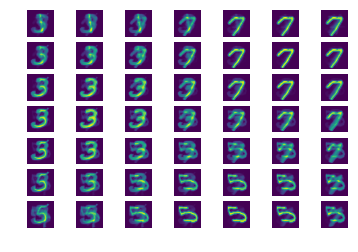

In [22]:
config = {
    'sigma': 2,
    'size_k': 7,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

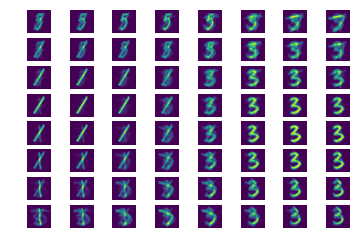

In [23]:
config = {
    'sigma': 2,
    'size_k': 8,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

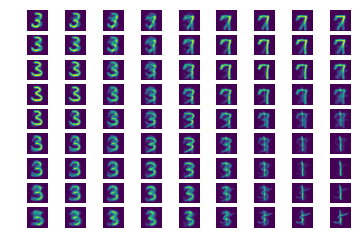

In [24]:
config = {
    'sigma': 2,
    'size_k': 9,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

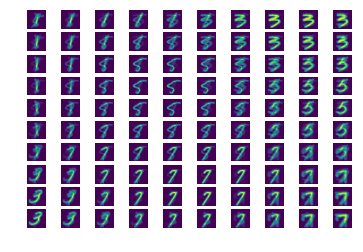

In [25]:
config = {
    'sigma': 2,
    'size_k': 10,
    'eta': 0.9,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

## Varying eta

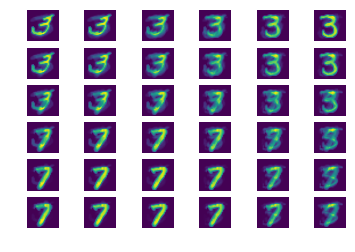

In [30]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.7,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

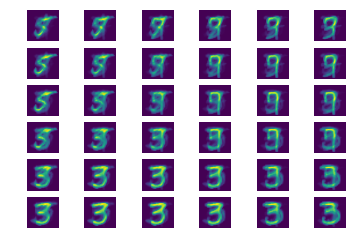

In [31]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.5,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

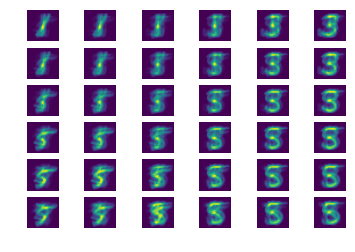

In [32]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.3,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

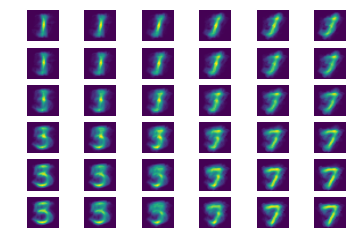

In [33]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.1,
    'tmax': 5000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

## Varying tmax

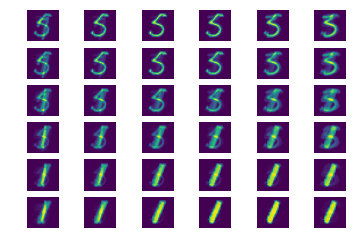

In [34]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 4000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

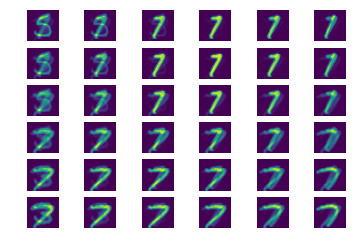

In [35]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 3000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

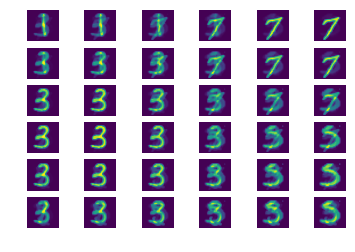

In [36]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 2000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

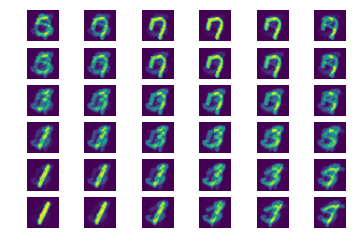

In [37]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 1000
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

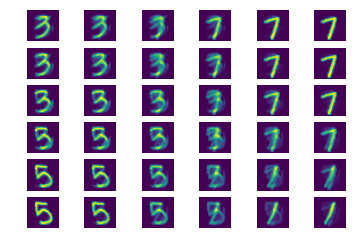

In [38]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 500
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

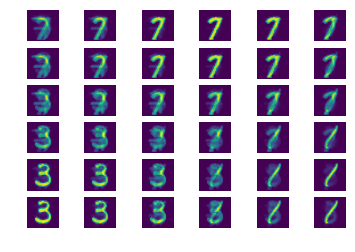

In [39]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 100
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

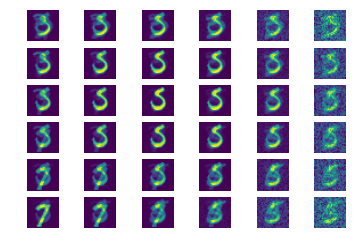

In [40]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 10
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

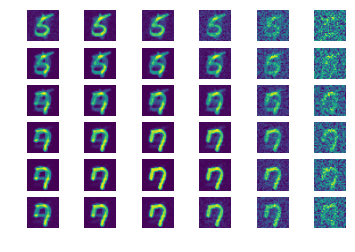

In [41]:
config = {
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 5
}

kohonen(_sigma = config['sigma'], _eta = config['eta'], _tmax = config['tmax'], _size_k = config['size_k'])

## Evaluating Kohonen map by evaluting performance of classification

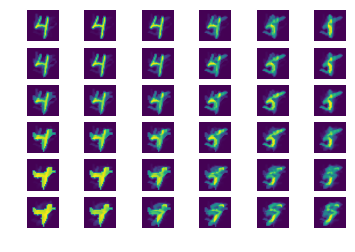

Number of correct predictions for training set: 995
Test accuracy: 0.641935483871
---------------------------------------
Number of correct predictions for testing set: 200
Test accuracy: 0.444444444444
---------------------------------------
Clusters in Kohonen map: 
{0: 9, 1: 4, 2: 9, 3: 9, 4: 1, 5: 1, 6: 4, 8: 4, 9: 4, 10: 5, 11: 5, 12: 4, 13: 9, 14: 4, 15: 5, 16: 5, 17: 5, 18: 4, 19: 4, 20: 4, 21: 5, 22: 5, 23: 1, 24: 4, 26: 9, 27: 4, 28: 5, 29: 5, 32: 4, 33: 9, 34: 5, 35: 9}


In [22]:
config = {
    'targetdigits': [1, 4, 5, 9],
    'sigma': 2,
    'size_k': 6,
    'eta': 0.9,
    'tmax': 5000
}

kohonen_test_supervised(targetdigits = config['targetdigits'], 
                        _sigma = config['sigma'], 
                        _size_k = config['size_k'], 
                        _eta = config['eta'], 
                        _tmax = config['tmax'])

This is not a good result, but by looking at the visualization of Kohonen Map, we can actually understand why this is the case. It seems like the Map is only able to recognize 4 and 5 well, which would explain why the test accuracy is around 50%.  
  
There could be few reasons for this
- Maybe the value of sigma is too high, causing all neurons to be heavily affected by the last few training images
- Maybe the value of eta is too high, causing all neurons to be updated too aggresively

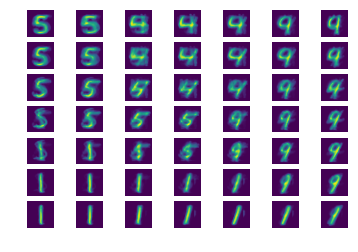

Number of correct predictions for training set: 1300
Test accuracy: 0.838709677419
---------------------------------------
Number of correct predictions for testing set: 300
Test accuracy: 0.666666666667
---------------------------------------
Clusters in Kohonen map: 
{0: 5, 1: 5, 2: 4, 3: 4, 4: 4, 5: 9, 6: 4, 7: 5, 8: 5, 9: 5, 10: 4, 11: 4, 12: 9, 13: 4, 14: 5, 15: 5, 16: 9, 17: 4, 18: 4, 19: 9, 20: 4, 21: 5, 22: 5, 23: 5, 24: 4, 25: 4, 26: 9, 27: 9, 28: 1, 29: 1, 30: 5, 31: 5, 32: 9, 33: 9, 34: 9, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 9, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1}


In [25]:
config = {
    'targetdigits': [1, 4, 5, 9],
    'sigma': 1,
    'size_k': 7,
    'eta': 0.3,
    'tmax': 5000
}

kohonen_test_supervised(targetdigits = config['targetdigits'], 
                        _sigma = config['sigma'], 
                        _size_k = config['size_k'], 
                        _eta = config['eta'], 
                        _tmax = config['tmax'])

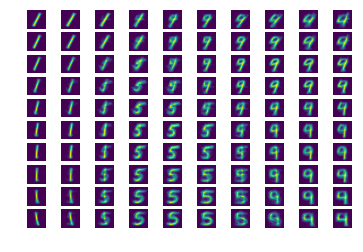

Number of correct predictions for training set: 1357
Test accuracy: 0.875483870968
---------------------------------------
Number of correct predictions for testing set: 351
Test accuracy: 0.78
---------------------------------------
Clusters in Kohonen map: 
{0: 1, 1: 1, 2: 1, 3: 4, 4: 9, 5: 9, 6: 9, 7: 4, 8: 4, 9: 4, 10: 1, 11: 1, 12: 1, 13: 9, 14: 4, 15: 9, 16: 9, 17: 9, 18: 4, 19: 4, 20: 1, 21: 1, 22: 1, 23: 5, 24: 4, 25: 9, 26: 9, 27: 9, 28: 9, 29: 9, 30: 1, 31: 1, 32: 5, 33: 5, 34: 9, 35: 9, 36: 9, 37: 9, 38: 9, 39: 4, 40: 1, 41: 1, 42: 1, 43: 5, 44: 5, 45: 9, 46: 4, 47: 4, 48: 9, 49: 4, 50: 1, 51: 1, 52: 1, 53: 5, 54: 5, 55: 5, 56: 9, 57: 4, 58: 9, 59: 9, 60: 1, 61: 1, 62: 1, 63: 5, 64: 5, 65: 5, 66: 9, 67: 9, 68: 9, 69: 9, 70: 1, 71: 1, 72: 5, 73: 5, 74: 5, 75: 5, 76: 5, 77: 4, 78: 9, 79: 4, 80: 1, 81: 1, 82: 5, 83: 5, 84: 5, 85: 5, 86: 5, 87: 4, 88: 9, 89: 4, 90: 1, 91: 1, 92: 5, 93: 5, 94: 5, 95: 5, 96: 5, 97: 9, 98: 9, 99: 4}


In [26]:
config = {
    'targetdigits': [1, 4, 5, 9],
    'sigma': 1,
    'size_k': 10,
    'eta': 0.2,
    'tmax': 8000
}

kohonen_test_supervised(targetdigits = config['targetdigits'], 
                        _sigma = config['sigma'], 
                        _size_k = config['size_k'], 
                        _eta = config['eta'], 
                        _tmax = config['tmax'])

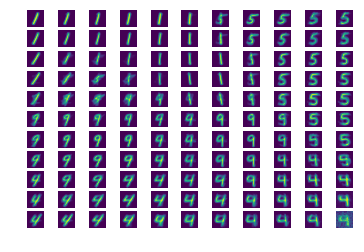

Number of correct predictions for training set: 1393
Test accuracy: 0.898709677419
---------------------------------------
Number of correct predictions for testing set: 361
Test accuracy: 0.802222222222
---------------------------------------
Clusters in Kohonen map: 
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 5, 19: 5, 20: 5, 21: 5, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 30: 5, 31: 5, 32: 5, 33: 1, 34: 1, 35: 5, 36: 9, 37: 1, 38: 1, 39: 1, 40: 1, 41: 5, 42: 5, 43: 5, 44: 1, 45: 4, 46: 5, 47: 4, 48: 9, 49: 1, 50: 1, 51: 9, 52: 5, 53: 5, 54: 5, 55: 9, 56: 9, 57: 9, 58: 9, 59: 9, 60: 4, 61: 9, 62: 9, 63: 5, 64: 5, 65: 5, 66: 9, 67: 9, 68: 9, 69: 9, 70: 4, 71: 4, 72: 9, 73: 9, 74: 4, 75: 5, 76: 5, 77: 9, 78: 9, 79: 9, 80: 9, 81: 9, 82: 4, 83: 9, 84: 9, 85: 4, 86: 4, 87: 5, 88: 4, 89: 9, 90: 9, 91: 4, 92: 4, 93: 4, 94: 9, 95: 9, 96: 4, 97: 4, 98: 4, 99: 4, 100: 9, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4

In [32]:
config = {
    'targetdigits': [1, 4, 5, 9],
    'sigma': 0.8,
    'size_k': 11,
    'eta': 0.2,
    'tmax': 8000
}

kohonen_test_supervised(targetdigits = config['targetdigits'], 
                        _sigma = config['sigma'], 
                        _size_k = config['size_k'], 
                        _eta = config['eta'], 
                        _tmax = config['tmax'])